first column is left LFP channel from the left SCC and third column is right LFP from the right SCC. The sampling rate is 422HZ

In [2]:
import numpy as np
chirpdata = np.genfromtxt('DBS901_Chirp.txt', delimiter= ',')
print (len(chirpdata))

404548


[  1.06637492e+00   3.41336095e+00   4.50105339e+00 ...,   5.81610578e-05
  -5.22569770e-03  -1.47033745e-02]
[ 0.13127399  0.41436771  0.53516182 ...,  0.00360746 -0.00489058
 -0.01244208]
[  0.00000000e+00   2.36956398e-03   4.73912796e-03 ...,   9.58595261e+02
   9.58597630e+02   9.58600000e+02]


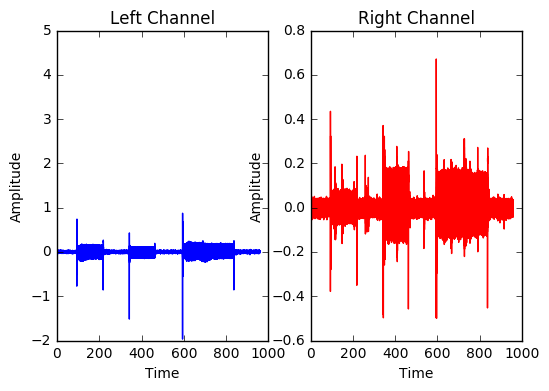

In [30]:
import matplotlib.pyplot as plt
sr = 422
sec_col = 958.6
dp = len(chirpdata)

time = np.linspace(0,sec_col,dp)

Lchannel = chirpdata[:,][:,0]
Rchannel = chirpdata[:,][:,2]

print(Lchannel)
print(Rchannel)
print(time)

plt.subplot(1,2,1)
plt.title('Left Channel')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(time,Lchannel,'b')

plt.subplot(1,2,2)
plt.plot(time,Rchannel,'r')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Right Channel')
plt.show()

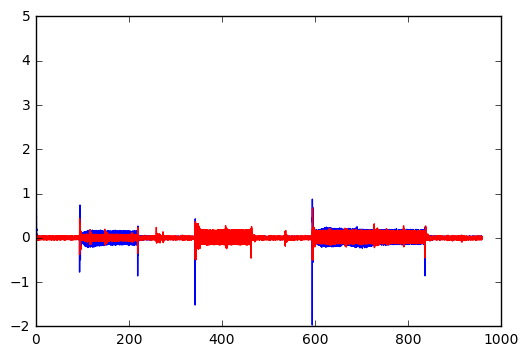

In [4]:
plt.plot(time,Lchannel,'b' , time, Rchannel, 'r')
plt.show()

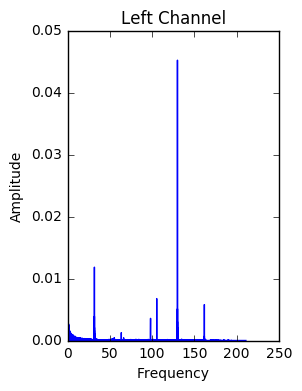

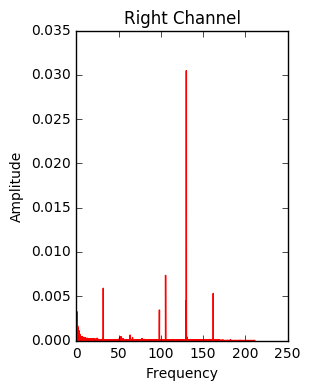

In [9]:
y = Rchannel
x = Lchannel
fft_outputy = np.fft.rfft(y)
yAmplitude = [np.sqrt(i.real**2 + i.imag**2)/len(fft_outputy) for i in fft_outputy]
fft_outputx = np.fft.rfft(x)
xAmplitude = [np.sqrt(i.real**2 + i.imag**2)/len(fft_outputx) for i in fft_outputx]
Fq = [(i*1.0/dp)*sr for i in range(dp//2+1)] 
plt.xlabel('Frequency')
plt.ylabel('Amplitude')


plt.subplot(1,2,1)
plt.plot(Fq, xAmplitude, 'b')
plt.title('Left Channel')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(1,2,2)
plt.plot(Fq, yAmplitude, 'r')
plt.title('Right Channel')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

# *Could have just used np.abs for amplitude ** Never mind, caused everything to crash -_-'

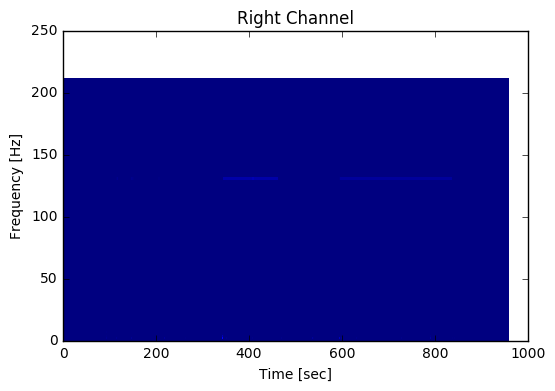

In [10]:
from scipy import signal

f, t, Sxx = signal.spectrogram(y,sr)
plt.pcolormesh(t, f, Sxx)
plt.title('Right Channel')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

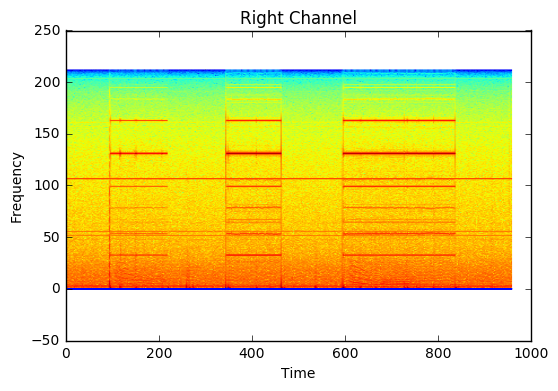

In [28]:
plt.plot(time, y)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Right Channel')
Pxx, freqs, bins, im = plt.specgram(y, NFFT=1024, Fs=sr, noverlap=0)
plt.show()

It seems that the Matplotlib function is much better for this analysis.

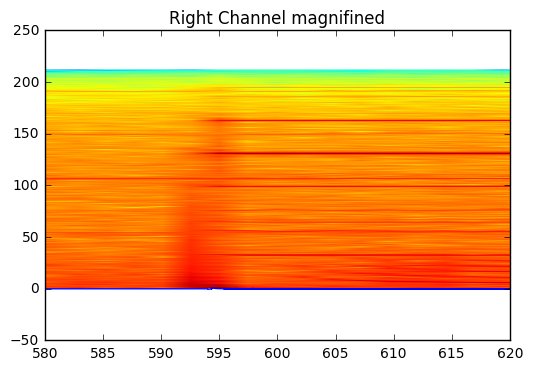

In [12]:
plt.plot(time, y)
plt.title('Right Channel magnifined')
Pxx, freqs, bins, im = plt.specgram(x, NFFT=1024, Fs=sr, noverlap=0)
plt.axis([580,620,-50,250])
plt.show()

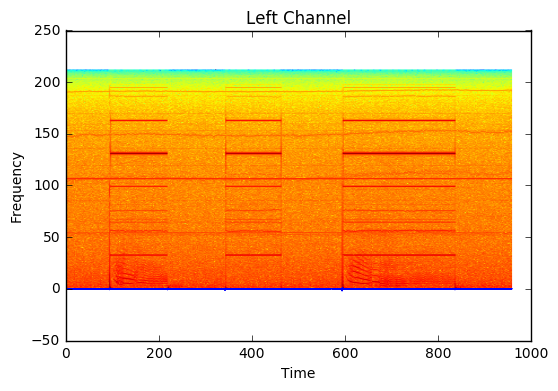

In [29]:
plt.plot(time, x)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Left Channel')
Pxx, freqs, bins, im = plt.specgram(x, NFFT=1024, Fs=sr, noverlap=0)
plt.show()

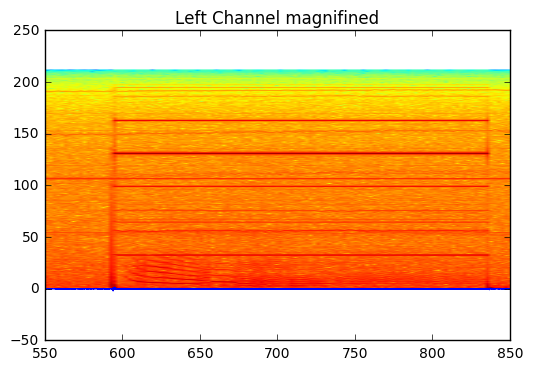

In [14]:
plt.plot(time, x)
plt.title('Left Channel magnifined')
Pxx, freqs, bins, im = plt.specgram(x, NFFT=1024, Fs=sr, noverlap=0)
plt.axis([550,850,-50,250])
plt.show()

In [21]:
Lbstim = chirpdata[244760:248980,][:,0]
#Left channel right before stimulation: 580 - 590 seconds
Ldstim = chirpdata[251090:255310,][:,0]
#Left channel during stimulation: 595 - 605 seconds
Lastim = chirpdata[358700:362920,][:,0]
#Left channel right after stimulation: 850 - 860 seconds


Rbstim = chirpdata[244760:248980,][:,2]
#Right channel right before stimulation: 580 - 590 seconds
Rdstim = chirpdata[251090:255310,][:,2]
#Right channel during stimulation: 595 - 605 seconds
Rastim = chirpdata[358700:362920,][:,2]
#Right channel right after stimulation: 850 - 860 seconds
 





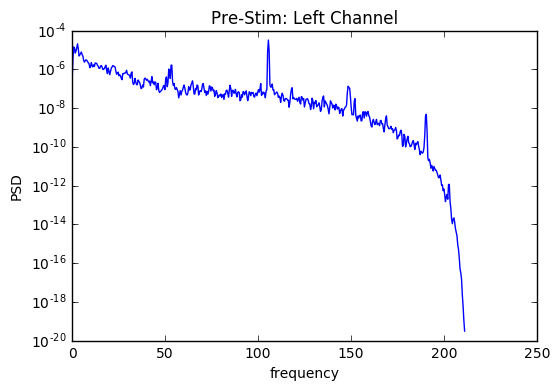

In [22]:
f, Pxx_den = signal.welch(Lbstim, fs=sr, nperseg=1024)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency')
plt.ylabel('PSD')
plt.title('Pre-Stim: Left Channel')
plt.show()

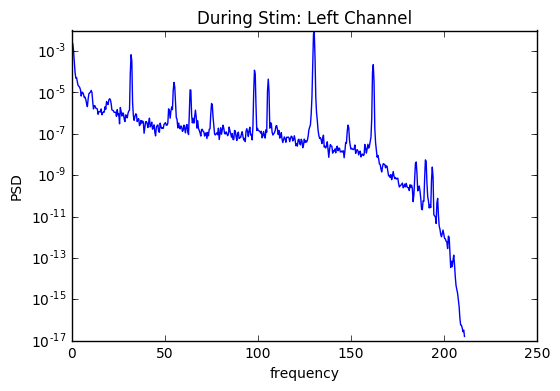

In [23]:
f, Pxx_den = signal.welch(Ldstim, fs=sr, nperseg=1024)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency')
plt.ylabel('PSD')
plt.title('During Stim: Left Channel')
plt.show()


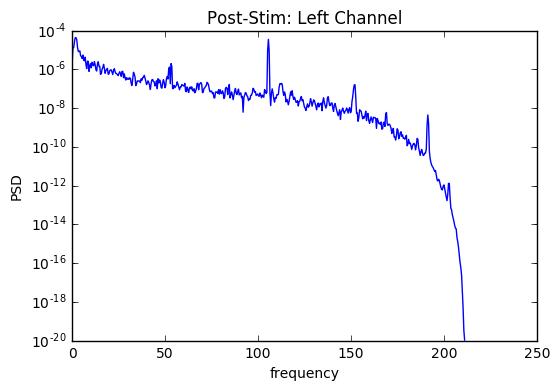

In [24]:
f, Pxx_den = signal.welch(Lastim, fs=sr, nperseg=1024)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency')
plt.ylabel('PSD')
plt.title('Post-Stim: Left Channel')
plt.show()


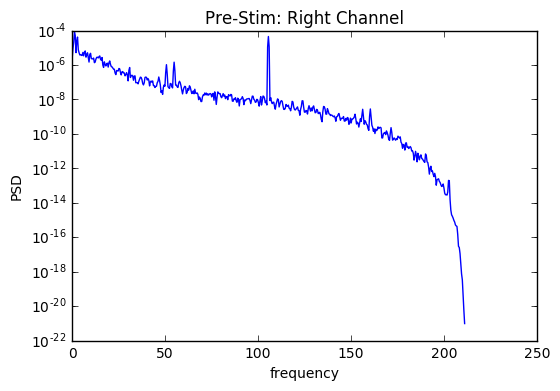

In [31]:
f, Pxx_den = signal.welch(Rbstim, fs=sr, nperseg=1024)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency')
plt.ylabel('PSD')
plt.title('Pre-Stim: Right Channel')
plt.show()

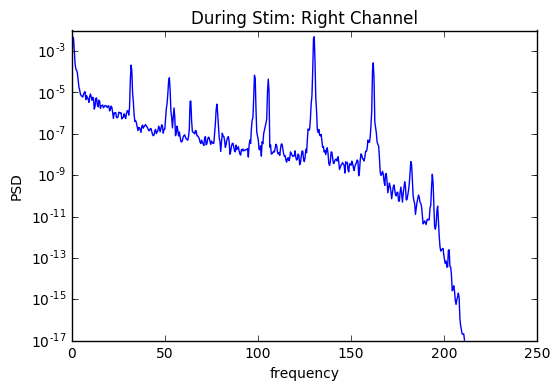

In [32]:
f, Pxx_den = signal.welch(Rdstim, fs=sr, nperseg=1024)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency')
plt.ylabel('PSD')
plt.title('During Stim: Right Channel')
plt.show()

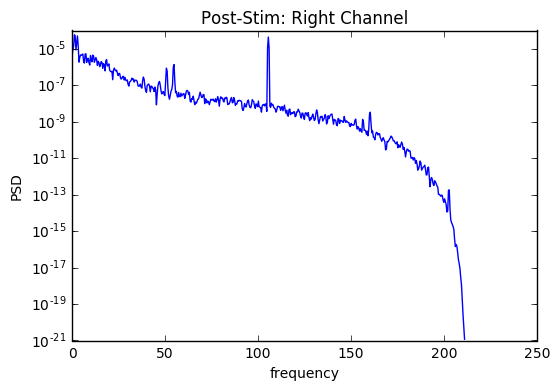

In [33]:
f, Pxx_den = signal.welch(Rastim, fs=sr, nperseg=1024)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency')
plt.ylabel('PSD')
plt.title('Post-Stim: Right Channel')
plt.show()